<a href="https://colab.research.google.com/github/AffanKhan60/Affankhan60/blob/main/opencv_pracrtice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python


In [2]:
from google.colab import files
uploaded = files.upload()

Saving final assembly.JPG to final assembly.JPG


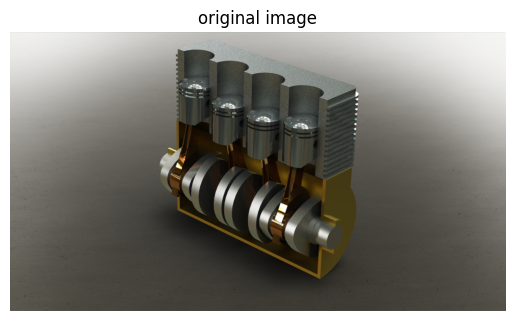

In [5]:
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('final assembly.JPG')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("original image")
plt.axis("off")
plt.show()

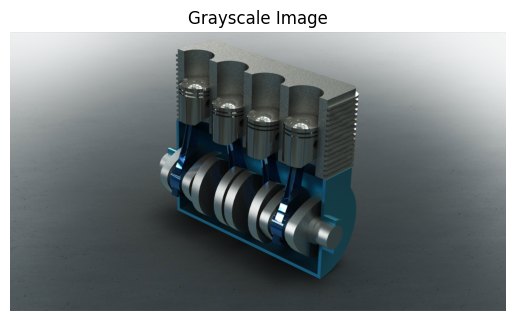

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

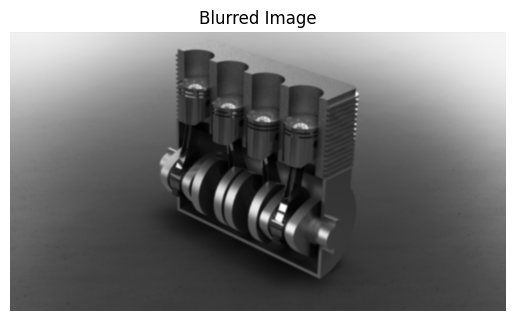

In [18]:
blurred = cv2.GaussianBlur(gray_image, (15,15), 0)
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis('off')
plt.show()

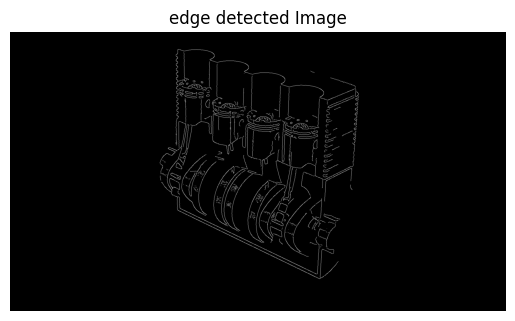

In [24]:
edges= cv2.Canny(blurred, threshold1=10, threshold2=30)
plt.imshow(edges, cmap='gray')
plt.title("edge detected Image")
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

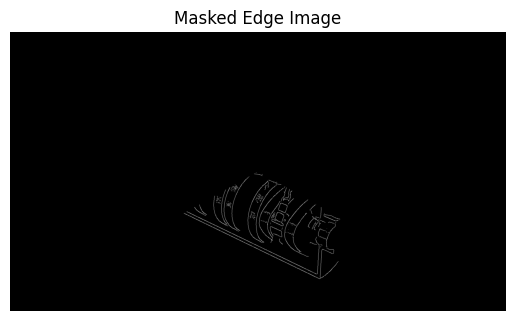

In [27]:
import numpy as np
mask = np.zeros_like(edges)
height, width = edges.shape
polygon = np.array([[(0, height), (width, height), (width//2, height//2)]], dtype=np.int32)
cv2.fillPoly(mask, polygon, 255)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap='gray')
plt.title("Masked Edge Image")
plt.axis('off')
plt.show

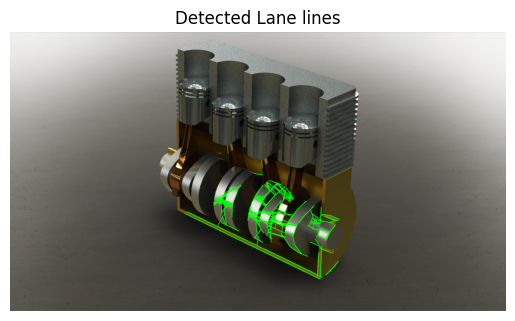

In [45]:
lines = cv2.HoughLinesP( masked_edges, rho=1, theta=np.pi/180, threshold=10, minLineLength=30, maxLineGap=20)
line_image = np.copy(image)
if lines is not None:
  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1,y1), (x2, y2), (0, 255, 0), 2)

line_image_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)
plt.imshow(line_image_rgb)
plt.title("Detected Lane lines")
plt.axis('off')
plt.show()